In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the dataset loader
from sklearn.datasets import load_iris

# Import the tools for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree # For visualizing the tree

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
# iris.data contains the measurements (features)
# iris.feature_names contains the column names
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the 'species' column (the target we want to predict)
# iris.target contains the species as numbers (0, 1, 2)
df['species'] = iris.target

print("--- First 5 Rows ---")
print(df.head())

print("\n--- Data Info ---")
df.info()


--- First 5 Rows ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species   

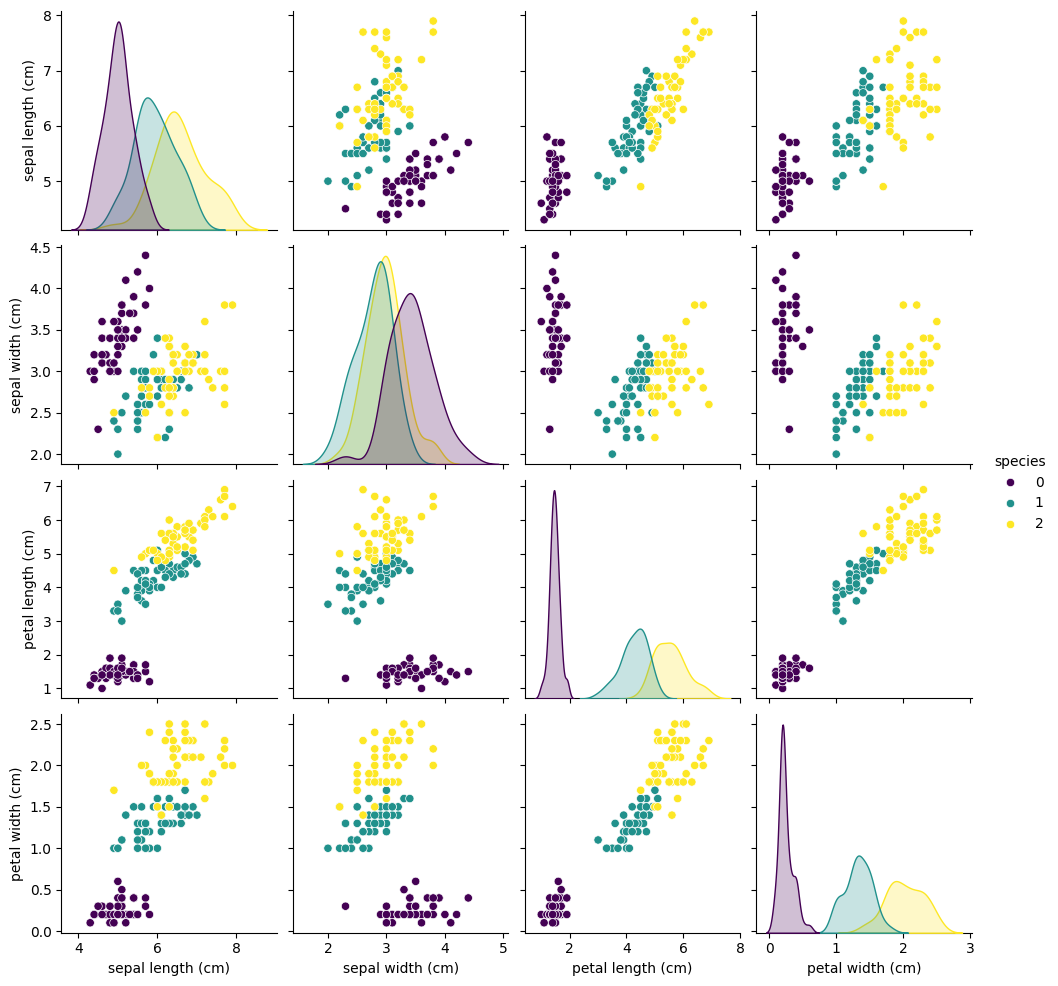

In [4]:
# Use a pairplot to see relationships between all features
# 'hue="species"' colors the dots by their species
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

In [5]:
# X gets all columns EXCEPT 'species'
X = df.drop('species', axis=1)

# y gets ONLY the 'species' column
y = df['species']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (150, 4)
Target (y) shape: (150,)


In [6]:
# Split the data: 80% for training, 20% for testing
# random_state=42 ensures you get the same "random" split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (120, 4)
Testing data: (30, 4)


In [7]:
# 1. Create the model object
model = DecisionTreeClassifier(random_state=42)

# 2. Train the model using the training data
model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


Model Accuracy: 100.00%

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- Confusion Matrix ---


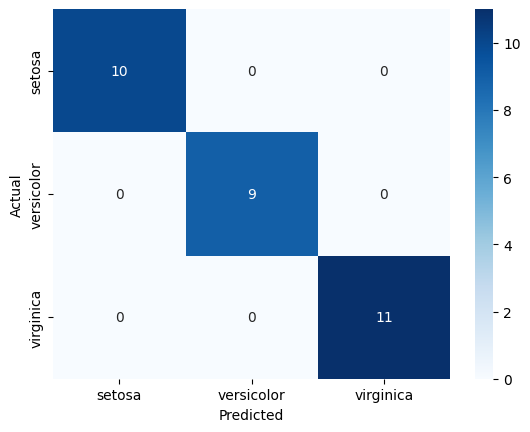

In [8]:
# 1. Make predictions on the test data
y_pred = model.predict(X_test)

# 2. Calculate the accuracy
# This compares the model's predictions (y_pred) to the actual answers (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 3. Show a detailed Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 4. Show a Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

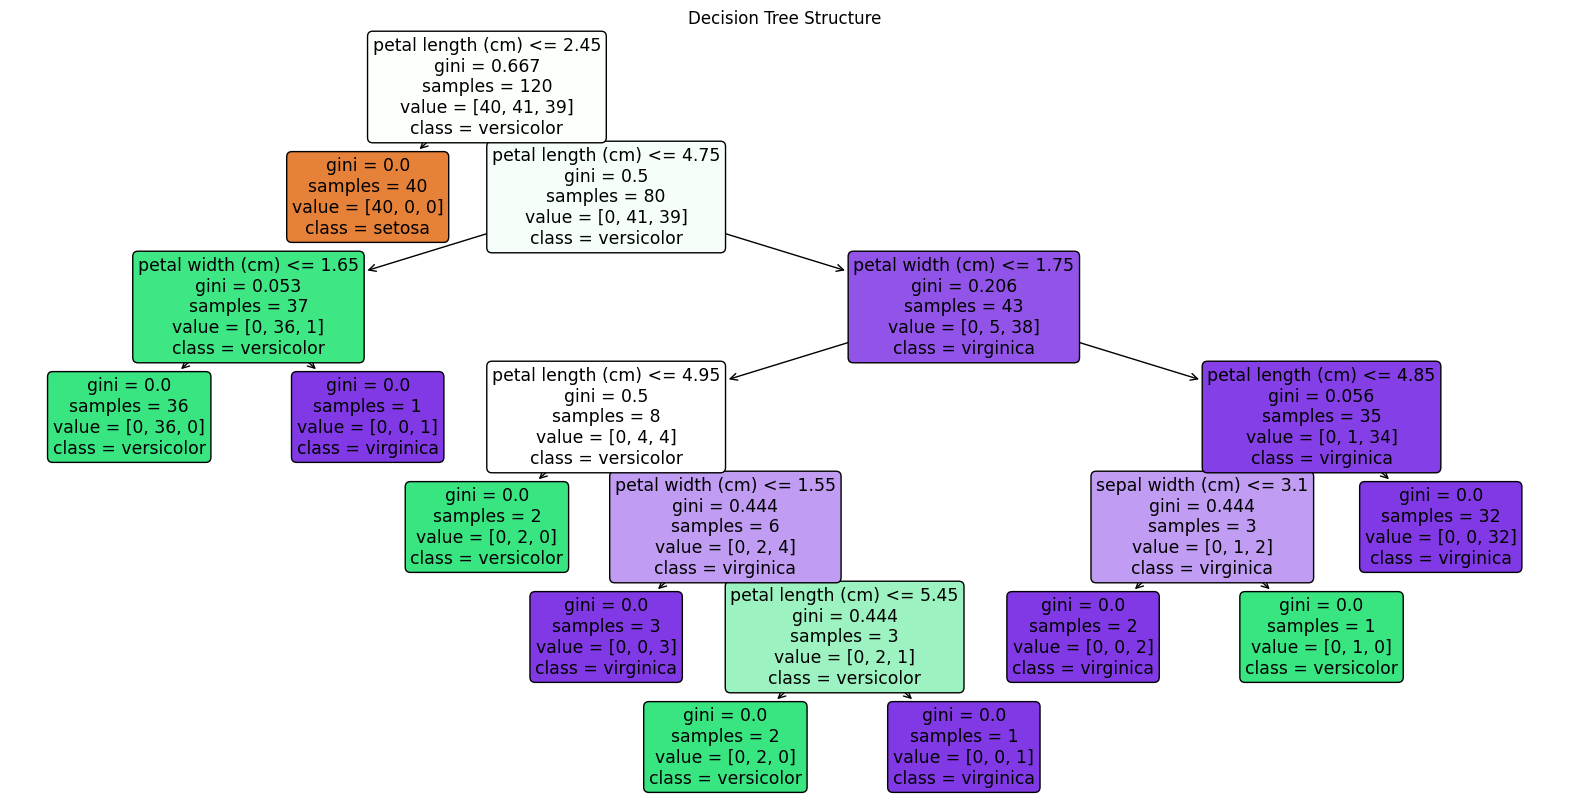

In [9]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               feature_names=iris.feature_names, 
               class_names=iris.target_names, 
               filled=True, 
               rounded=True)
plt.title("Decision Tree Structure")
plt.show()